In [52]:
# Importing necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
from qiskit.circuit.library import HGate, CXGate, XGate, ZGate
import numpy as np

In [53]:
# Ignoring deprication (c_if function) warning
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

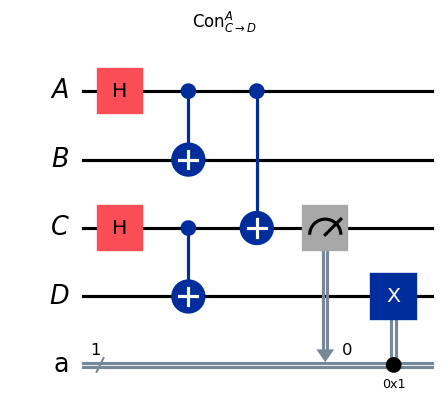

In [54]:
# Connection circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')

# Initialize classical register for X gate usage
creg_c = ClassicalRegister(1, name='a')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, creg_c)

# Adding gates and measurement to the circuit
qc.append(h_gate, [0])
qc.append(h_gate, [2])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [2,3])
qc.append(cx_gate, [0,2])

qc.measure(qreg_c, creg_c)
qc.append(x_gate, [3]).c_if(creg_c, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Con$^{A}_{C\to D}$")
plt.show()

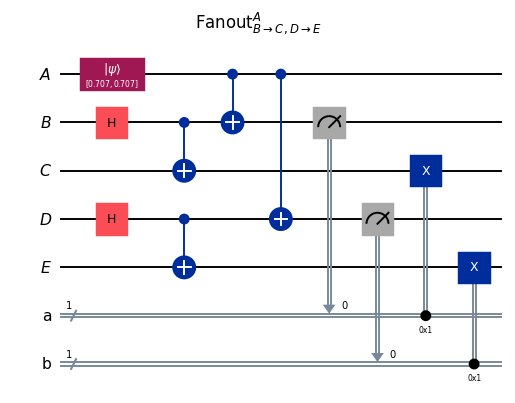

In [55]:
# Connection:Fanout circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')
qreg_e = QuantumRegister(1, name='E')

# Initialize classical registers for X gate usages
creg_b = ClassicalRegister(1, name='a')
creg_d = ClassicalRegister(1, name='b')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, qreg_e, creg_b, creg_d)

# Initialize A quantum register to superposition
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
qc.initialize([alpha, beta], qreg_a)

# Adding gates and measurement to the circuit
qc.append(h_gate, [1])
qc.append(h_gate, [3])
qc.append(cx_gate, [1,2])
qc.append(cx_gate, [3,4])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [0,3])

qc.measure(qreg_b, creg_b)
qc.measure(qreg_d, creg_d)
qc.append(x_gate, [2]).c_if(creg_b, 1)
qc.append(x_gate, [4]).c_if(creg_d, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Fanout$^{A}_{B\to C,D\to E}$")
plt.show()

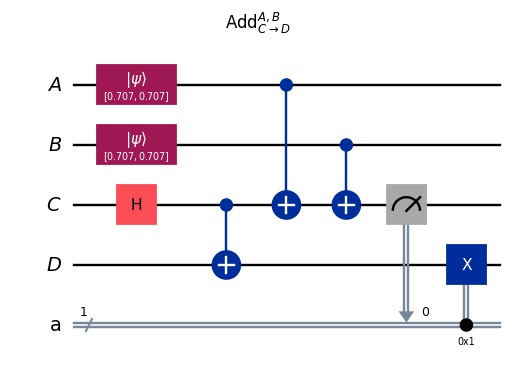

In [56]:
# Connection:Add circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')
qreg_d = QuantumRegister(1, name='D')

# Initialize classical register for X gate usages
creg_c = ClassicalRegister(1, name='a')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
x_gate = XGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, qreg_d, creg_c)

# Initialize A and B quantum registers to superposition
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
gamma = 1/np.sqrt(2)
delta = 1/np.sqrt(2)
qc.initialize([alpha, beta], qreg_a)
qc.initialize([gamma, delta], qreg_b)

# Adding gates and measurement to the circuit
qc.append(h_gate, [2])
qc.append(cx_gate, [2,3])
qc.append(cx_gate, [0,2])
qc.append(cx_gate, [1,2])

qc.measure(qreg_c, creg_c)
qc.append(x_gate, [3]).c_if(creg_c, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Add$^{A,B}_{C\to D}$")
plt.show()

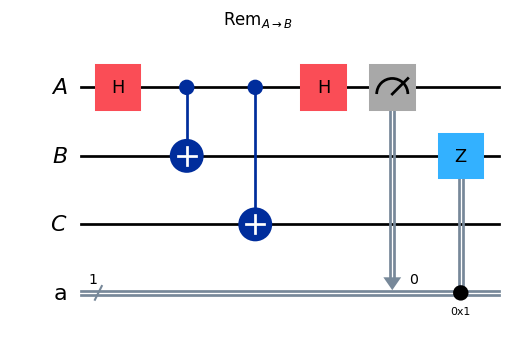

In [57]:
# Removal circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')

# Initialize classical registers for Z gate usage
creg_a = ClassicalRegister(1, name='a')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
z_gate = ZGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, creg_a)

# Adding gates and measurement to the circuit
qc.append(h_gate, [0])
qc.append(cx_gate, [0,1])
qc.append(cx_gate, [0,2])
qc.append(h_gate, [0])

qc.measure(qreg_a, creg_a)
qc.append(z_gate, [1]).c_if(creg_a, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"Rem$_{A\to B}$")
plt.show()

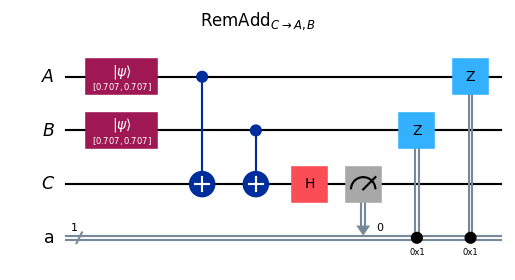

In [58]:
# Removal:Add circuit

# Initialize quantum registers
qreg_a = QuantumRegister(1, name='A')
qreg_b = QuantumRegister(1, name='B')
qreg_c = QuantumRegister(1, name='C')

# Initialize classical registers for Z gate usages
creg_c = ClassicalRegister(1, name='a')

# Initialize quantum gates
h_gate = HGate()
cx_gate = CXGate()
z_gate = ZGate()

# Initialize quantum circuit
qc = QuantumCircuit(qreg_a, qreg_b, qreg_c, creg_c)

# Initialize A and B quantum registers to superposition
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
gamma = 1/np.sqrt(2)
delta = 1/np.sqrt(2)
qc.initialize([alpha, beta], qreg_a)
qc.initialize([gamma, delta], qreg_b)

# Adding gates and measurement to the circuit
qc.append(cx_gate, [0,2])
qc.append(cx_gate, [1,2])
qc.append(h_gate, [2])

qc.measure(qreg_c, creg_c)
qc.append(z_gate, [1]).c_if(creg_c, 1)
qc.append(z_gate, [0]).c_if(creg_c, 1)

# Plotting circuit
fix, ax = plt.subplots()
qc.draw("mpl", ax=ax)
plt.title(r"RemAdd$_{C\to A,B}$")
plt.show()